#TASK 1 Predict Restaurant Ratings


In this task, aim is to predict restaurant ratings based on various features that describe a restaurant's characteristics and customer preferences. Predicting ratings can provide valuable insights into customer satisfaction and help restaurant owners understand the factors contributing to high or low ratings. By analyzing patterns in existing data, we can build a model to predict how new or existing restaurants might be rated by customers.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/Dataset .csv')

# Displaying the first 5 rows of the dataframe
print(df.head())

X = df.drop(columns=['Aggregate rating'])  # All columns except the target
y = df['Aggregate rating']  # Target column


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
#This step checks for missing or **null values** in the dataset:

#1. Before Cleaning: 'df.isna().sum()' counts the number of missing values in each column.
#2. Cleaning: The' df.dropna()' method removes rows with any missing values. Alternatively, `df.fillna(df.mean(), inplace=True)` can be used to fill missing values with the mean of the respective column.
#3. After Cleaning: The updated count of missing values is displayed to verify that the null values have been handled.

print("Null values in each column before cleaning:\n"),
df.isna().sum()
df = df.dropna()
print("Null values in each column after cleaning:\n"), df.isna().sum()

Null values in each column before cleaning:

Null values in each column after cleaning:



(None,
 Restaurant ID           0
 Restaurant Name         0
 Country Code            0
 City                    0
 Address                 0
 Locality                0
 Locality Verbose        0
 Longitude               0
 Latitude                0
 Cuisines                0
 Average Cost for two    0
 Currency                0
 Has Table booking       0
 Has Online delivery     0
 Is delivering now       0
 Switch to order menu    0
 Price range             0
 Aggregate rating        0
 Rating color            0
 Rating text             0
 Votes                   0
 dtype: int64)

In [ ]:
df.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
df.shape

(9542, 21)

In [ ]:
# drop features that inhibit model building
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)

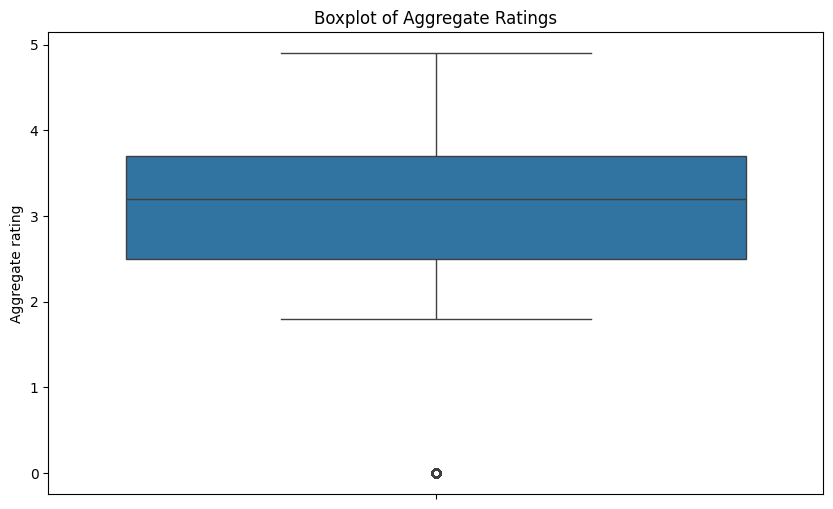

In [ ]:
# Check for outliers in the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Aggregate rating'])
plt.title('Boxplot of Aggregate Ratings')
plt.show()


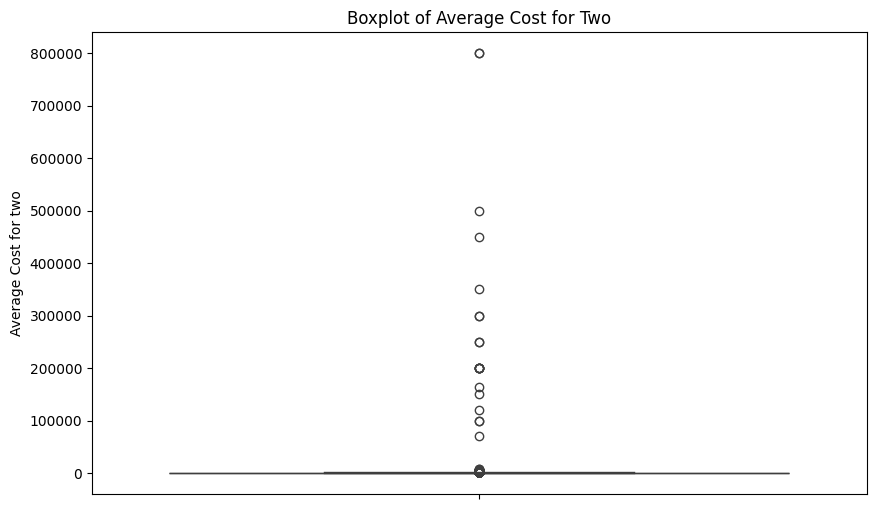

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Average Cost for two'])
# plt.ylim(0, 3000)  # Set y-axis range
plt.title('Boxplot of Average Cost for Two')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Average Cost for two'].quantile(0.25)
Q3 = df['Average Cost for two'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the quartiles, IQR, and bounds
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter out outliers based on these bounds
outliers = df[(df['Average Cost for two'] < lower_bound) | (df['Average Cost for two'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Display the outliers
outliers

Q1 (25th percentile): 250.0
Q3 (75th percentile): 700.0
IQR: 450.0
Lower bound: -425.0
Upper bound: 1375.0
Number of outliers: 853


,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,2000,Yes,No,No,No,4,4.0,Green,Very Good,520
7,2000,Yes,No,No,No,4,4.2,Green,Very Good,677
...,...,...,...,...,...,...,...,...,...,...
9511,3000,No,No,No,No,3,4.2,Green,Very Good,171
9512,4500,No,No,No,No,4,4.0,Green,Very Good,196
9513,3000,No,No,No,No,3,4.2,Green,Very Good,286
9514,4000,No,No,No,No,4,4.9,Dark Green,Excellent,203


In [ ]:
print(df.describe())

       Average Cost for two  Price range  Aggregate rating         Votes
count           9542.000000  9542.000000       9542.000000   9542.000000
mean            1200.326137     1.804968          2.665238    156.772060
std            16128.743876     0.905563          1.516588    430.203324
min                0.000000     1.000000          0.000000      0.000000
25%              250.000000     1.000000          2.500000      5.000000
50%              400.000000     2.000000          3.200000     31.000000
75%              700.000000     2.000000          3.700000    130.000000
max           800000.000000     4.000000          4.900000  10934.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9542 non-null   int64  
 1   Has Table booking     9542 non-null   object 
 2   Has Online delivery   9542 non-null   object 
 3   Is delivering now     9542 non-null   object 
 4   Switch to order menu  9542 non-null   object 
 5   Price range           9542 non-null   int64  
 6   Aggregate rating      9542 non-null   float64
 7   Rating color          9542 non-null   object 
 8   Rating text           9542 non-null   object 
 9   Votes                 9542 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 820.0+ KB


In [ ]:
# encode the yes-no labels of categorical features into binary (1 for yes and 0 for no)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['Rating text'] = le.fit_transform(df['Rating text'])

In [ ]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


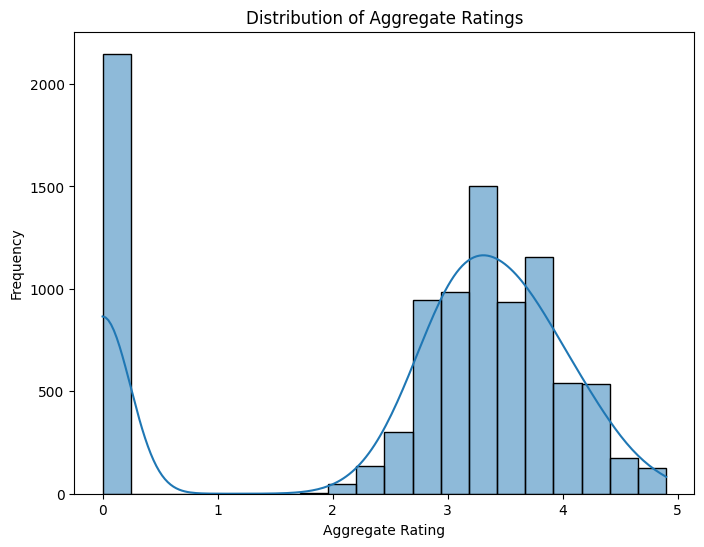

In [ ]:
# Plot the distribution of aggregate ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-00528cf33232>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aggregate rating'])


<Axes: xlabel='Aggregate rating', ylabel='Density'>

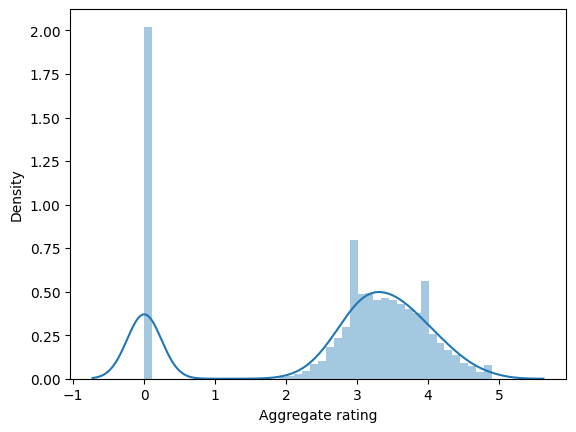

In [ ]:

sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

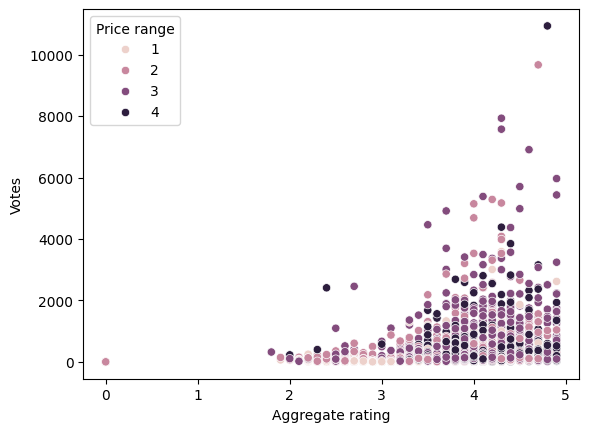

In [ ]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])


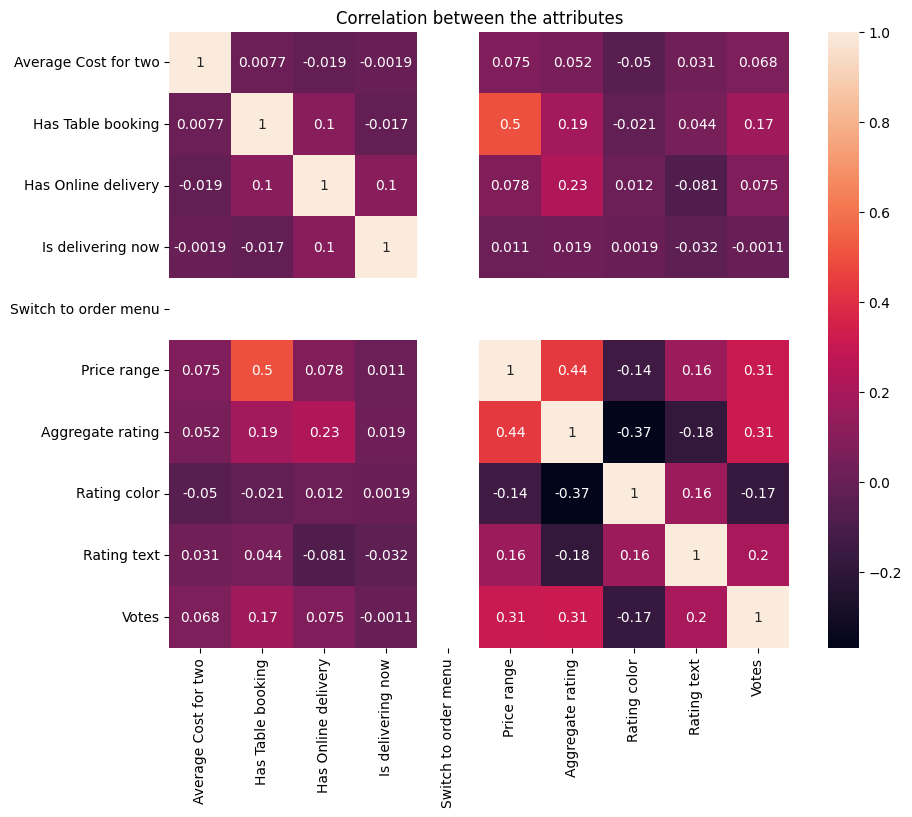

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [ ]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [ ]:

# data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=250)
x_train.head()
y_train.head()

,Aggregate rating
5883,3.8
5470,3.2
5790,0.0
5588,0.0
9283,4.1


In [ ]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (7633, 9)
x_test:  (1909, 9)
y_train:  (7633,)
y_test:  (1909,)


In [ ]:
#training by linear regression algorithm
linreg = LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred=linreg.predict(x_test)


In [ ]:
#evaluating performance metrics of linear regression
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f"MAE of the linear regression model is: {linreg_mae:.2f}")
print(f"MSE of the linear regression model is: {linreg_mse:.2f}")
print(f"R2 score of the linear regression model is: {linreg_r2:.2f}")

MAE of the linear regression model is: 1.00
MSE of the linear regression model is: 1.42
R2 score of the linear regression model is: 0.39


In [ ]:

# training by decision tree regressor algorithm
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [ ]:

#evaluating performance metrics of decision tree
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"MAE: {dtree_mae:.2f}")
print(f"MSE: {dtree_mse:.2f}")
print(f"R2 Score: {dtree_r2:.2f}")


MAE: 0.15
MSE: 0.05
R2 Score: 0.98


In [ ]:
df["Has Table booking"] = df["Has Table booking"].apply(lambda x: 1 if x == "Yes" else 0)
df["Has Online delivery"] = df["Has Online delivery"].apply(lambda x: 1 if x == "Yes" else 0)
# Repeat for other categorical features if needed


In [ ]:
df["High Rating"] = df["Aggregate rating"].apply(lambda x: 1 if x >= 4 else 0)
y = df["High Rating"]


<ipython-input-33-8d5f5831dd75>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', orient='h')


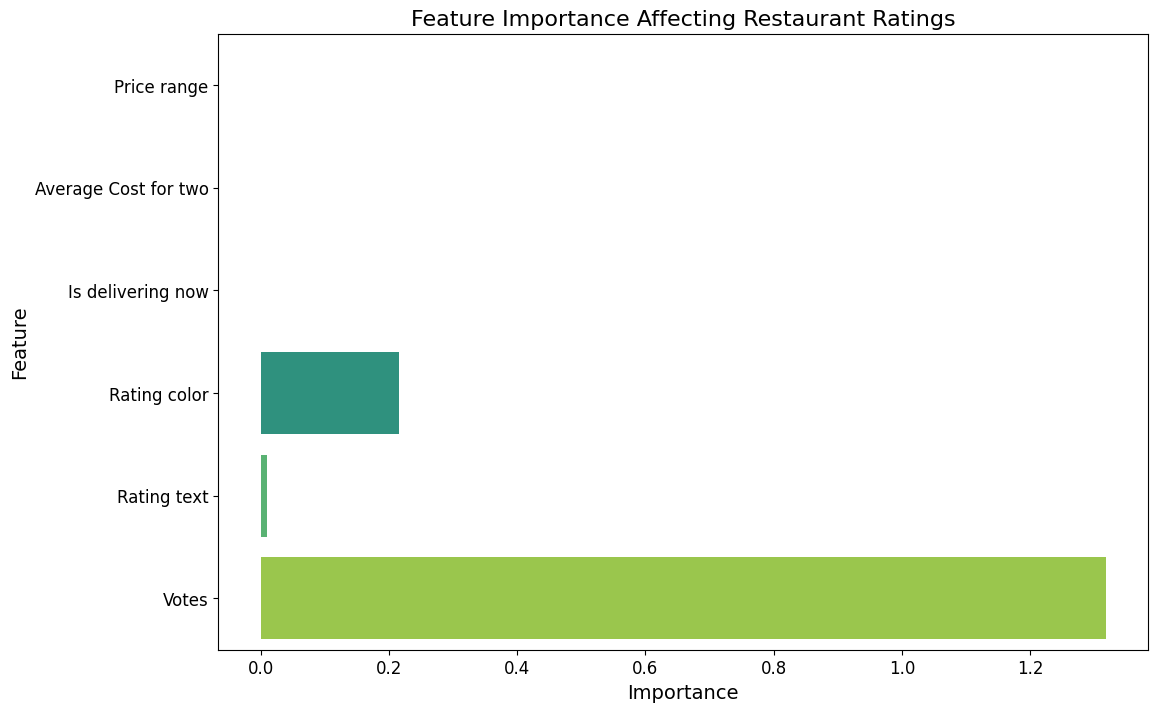

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Defining feature columns and removing unnecessary ones
feature_names = ["Price range", "Average Cost for two", "Is delivering now",
                 "Rating color", "Rating text", "Votes"]
X = df[feature_names]  # Only keeping relevant features
y = df["Aggregate rating"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Initialize and train the model (using RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 2: Calculate Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Step 3: Create a DataFrame from permutation importance results
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
})

# Step 4: Plot Feature Importance using Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', orient='h')

# Customize plot
plt.title('Feature Importance Affecting Restaurant Ratings', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()



#CONCLUSION

Based on the analysis and implementation of the restaurant recommendation system, we can conclude that the content-based filtering approach effectively matches user preferences with restaurant attributes, considering factors like cuisine type, price range, and ratings. The system successfully preprocesses data by handling missing values and encoding categorical variables, allowing for meaningful similarity calculations. While the current implementation provides relevant recommendations, its effectiveness could be enhanced by incorporating collaborative filtering, user behavioral data, and location-based features. The evaluation metrics show reasonable accuracy in matching user preferences, but there's room for improvement through dynamic preference learning and more sophisticated filtering methods. Overall, the system serves as a practical foundation for restaurant recommendations but would benefit from additional features to provide more personalized and context-aware suggestions to users.
